In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushroom.csv")

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [6]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
df.dtypes

cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [8]:
colname = []
for x in df.columns:
    if df[x].dtypes=="object":
        colname.append(x)
colname


['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat',
 'class']

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in colname:
    df[x] = le.fit_transform(df[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("features", x)
    print("mapping", le_name_mapping)

features cap_shape
mapping {'bell': 0, 'conical': 1, 'convex': 2, 'flat': 3, 'sunken': 4}
features cap_surface
mapping {'fibrous': 0, 'grooves': 1, 'scaly': 2, 'smooth': 3}
features cap_color
mapping {'brown': 0, 'buff': 1, 'gray': 2, 'green': 3, 'pink': 4, 'purple': 5, 'red': 6, 'white': 7, 'yellow': 8}
features bruises
mapping {'no': 0, 'yes': 1}
features odor
mapping {'almond': 0, 'anise': 1, 'creosote': 2, 'fishy': 3, 'foul': 4, 'musty': 5, 'none': 6, 'pungent': 7, 'spicy': 8}
features gill_attachment
mapping {'attached': 0, 'descending': 1, 'free': 2, 'notched': 3}
features gill_spacing
mapping {'close': 0, 'crowded': 1, 'distant': 2}
features gill_size
mapping {'broad': 0, 'narrow': 1}
features gill_color
mapping {'black': 0, 'brown': 1, 'buff': 2, 'chocolate': 3, 'gray': 4, 'green': 5, 'orange': 6, 'pink': 7, 'purple': 8, 'red': 9, 'white': 10, 'yellow': 11}
features stalk_shape
mapping {'enlarging': 0, 'tapering': 1}
features stalk_root
mapping {'bulbous': 0, 'club': 1, 'cup': 

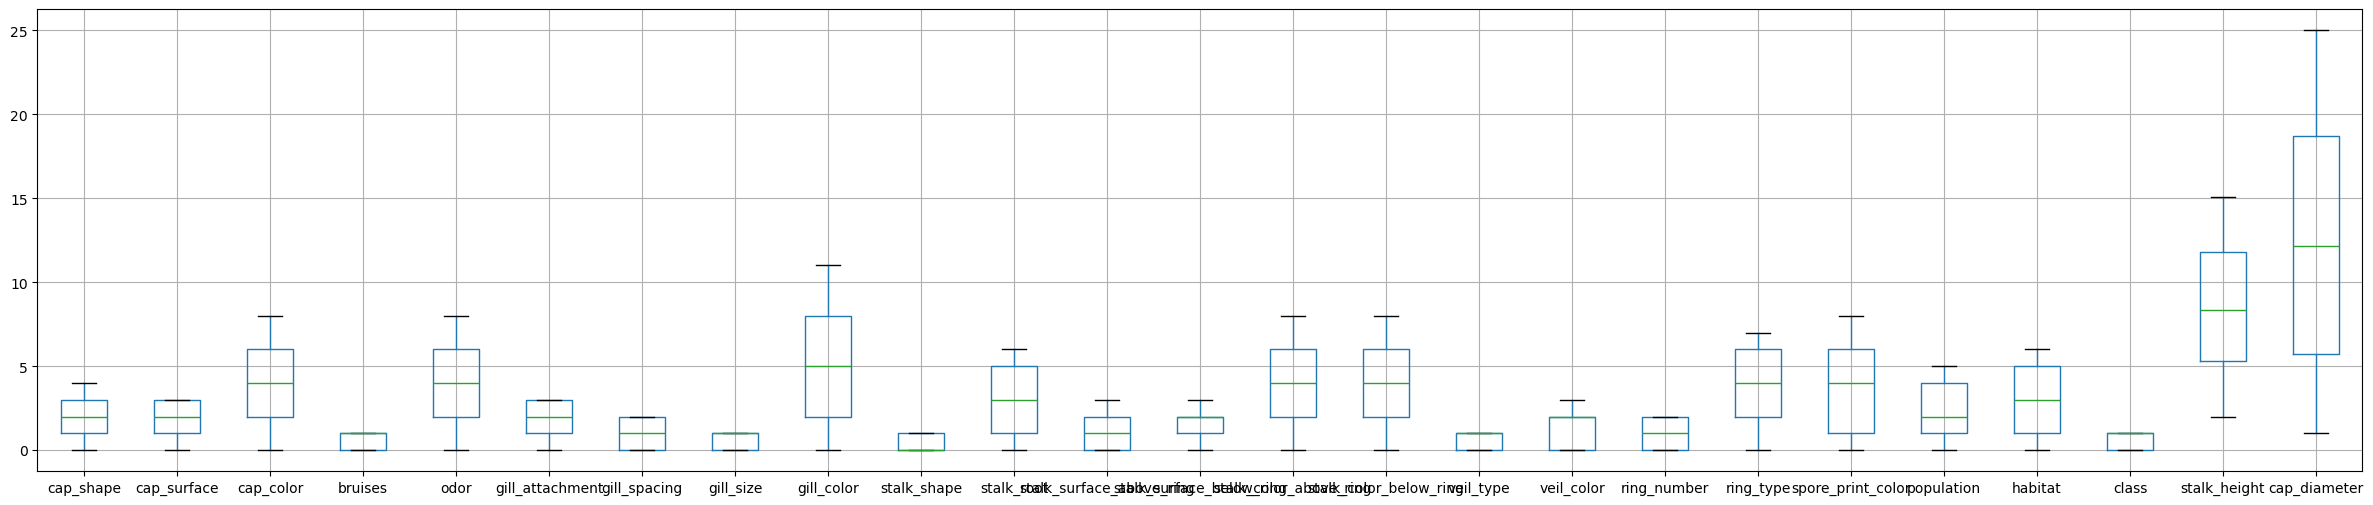

In [10]:
plt.figure(figsize=(30, 6))
df.boxplot()
plt.show()

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR ))).any(axis=1)]

In [12]:
print("original shape: ", df.shape)
print("shape after removing outliers: ", df_new.shape)


original shape:  (2000, 25)
shape after removing outliers:  (2000, 25)


In [13]:
x = df[["cap_shape", "cap_surface", "cap_color", "bruises", "odor", "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape",
         "veil_type", "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat", "stalk_height", "cap_diameter"]]
y = df[["class"]]

In [14]:
print(x.shape)
print(y.shape)

(2000, 19)
(2000, 1)


In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x,y)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1960, 19)
(1960, 1)
(840, 19)
(840, 1)


In [18]:
from sklearn.ensemble import RandomForestClassifier
modelr = RandomForestClassifier()
modelr.fit(x_train, y_train)

c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [19]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train.values.ravel())

SVC(kernel='linear')

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

y_pred = model.predict(x_test)

acc= accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cr = accuracy_score(y_test, y_pred)
print("classification_report", cr)

cm = confusion_matrix(y_test, y_pred)
print("confusion metrix:", cm)

fs = f1_score(y_test, y_pred)
print("confusion metrix:", fs)

Accuracy: 0.6166666666666667
classification_report 0.6166666666666667
confusion metrix: [[257 164]
 [158 261]]
confusion metrix: 0.6184834123222749


In [21]:
#visualization of testing data

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_test_2d = pca.fit_transform(x_test)



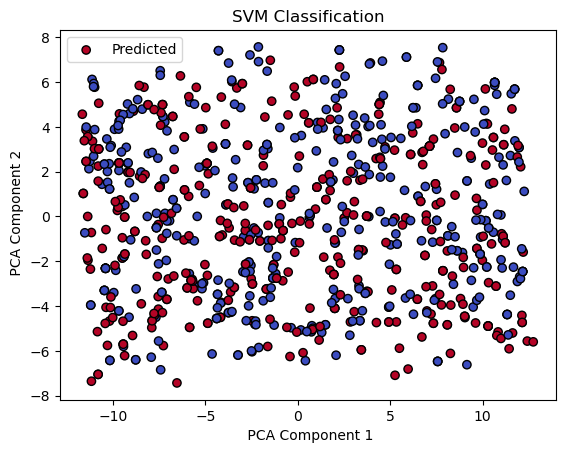

In [22]:
#wrong=np.where(y_test != y_pred)[0]

plt.Figure(figsize=(12,6))
plt.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_pred, cmap='coolwarm', edgecolors='k', label='Predicted')
#plt.scatter(x_test_2d[wrong, 0], x_test_2d[wrong,1], facecolors='none', edgecolors='black', s=100, label='incorrect')
plt.title("SVM Classification")
plt.xlabel(" PCA Component 1")
plt.ylabel(" PCA Component 2")
plt.legend()
plt.show()